<font color=skyblue>SVD指令使用</font>：
- numpy.linalg.svd
- sklearn.decomposition.TruncatedSVD


In [8]:
import numpy as np
from numpy.linalg import svd

X = np.array([[3,4,3],[1,2,3],[4,2,1]])
U, E, VT =svd(X, full_matrices = False) #full_matrices=Ture
X_ = (U @ np.diag(E) @ VT)

q = 1  #the number of components
Z = U[:, :2].T @ X  #PCA
Xq = U[:,:q] @ U[:, :q].T @ X
print("X=", X_)
print("Xq=", Xq) #project matrix

X= [[3. 4. 3.]
 [1. 2. 3.]
 [4. 2. 1.]]
Xq= [[3.48531728 3.56582631 2.95144867]
 [2.0213414  2.06803334 1.71171945]
 [2.49399962 2.55160973 2.11197755]]


<br>
<font color=skyblue>Image compression </font>：

Show an image
<br>

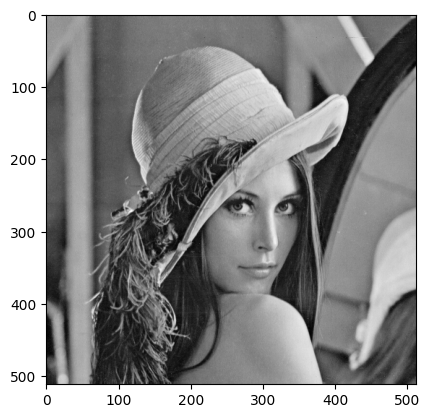

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# from skimage import io 也可用此套件轉呈灰白圖

imgfile = 'lenna1.png' #512*512*3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
# x = io.imread(imgfile, as_gray = True)
plt.imshow(X, cmap = 'gray')

plt.show()


<HR>
<font color=skyblue>利用Rank做影像壓縮 </font>：

即 $X_q = U_qU_q^TX$

q的大小決定壓縮倍數，壓縮倍數越大，壓縮倍數越大，影像品質越差。
<HR>

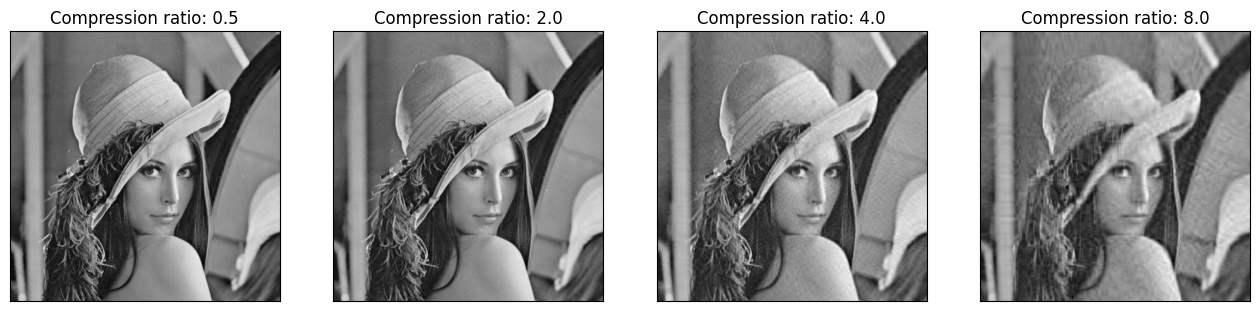

In [1]:
import matplotlib.pyplot as plt
from numpy.linalg import svd
import matplotlib.image as mpimg
import numpy as np
                          
imgfile = 'lenna1.png' #512*512*3
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale

p, N = X.shape # p by N, p = 512, N = 512
U, E, VT = svd(X, full_matrices = False)
q = np.array([p, p/4, p/8, p/16]).astype('int')
# q = np.array([512,200,100,50]).astype('int')
fig, ax = plt.subplots(1, 4, figsize = (16, 4))    
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(Xq, cmap = 'gray')
    ratio = p * N / (U.shape[0] + VT.shape[1] + 1) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()
    

### 定義montage ###

<br>

In [2]:
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') #image size sz*sz
    M = np.zeros((m*sz,n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

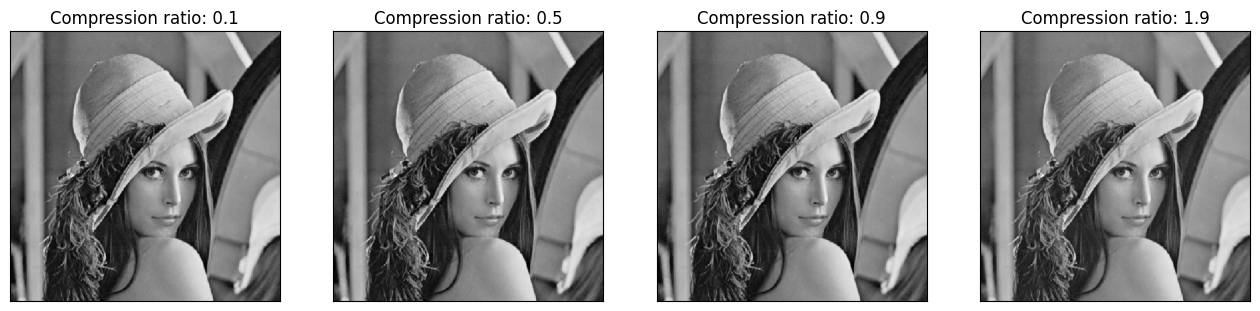

In [4]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt

imgfile ="Lenna.png" # 512x512x3
X = io.imread(imgfile, as_gray = True)
# 將圖像切割小區域
p, N = X.shape # p by N, p = 567, N = 567
patch_sz = 8
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch) #N_patch = 567*567 / 16*16 =  1255
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz) 

M = np.empty((patch_sz*patch_sz, 0))  
# initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M

U, E, VT = svd(M, full_matrices = False)
#q = np.array([256, 102, 51, 25]).astype('int')
q = np.array([p, p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

<HR>
<font color=skyblue>下載手寫數字影像圖</font>：

- 包含壓縮及生成
- 每張大小為 $28 × 28$ 灰階影像


In [39]:
from scipy.io import loadmat
 
mnist = loadmat("mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]
digit_to_show = 8
Digit = X[:, y == digit_to_show]

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",parser="auto")
X = mnist.data # data
y = mnist.target # labels
X, y = fetch_openml("mnist_784", parser = "auto", \
return_X_y = True)
X = X.T # 配 合 本 文 對 於 圖 像 矩 陣 的 定 義 p x N

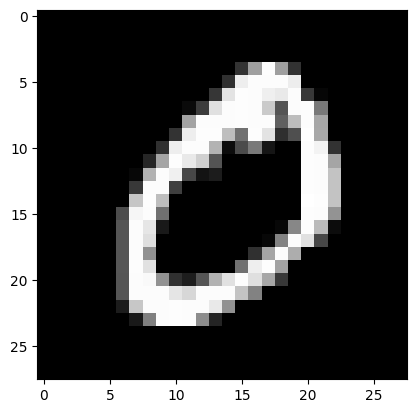

In [40]:
import matplotlib.pyplot as plt
import numpy as np
i = 0
img = X[:, i]
sz = np.sqrt(len(img)).astype('int')
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')
plt.show()

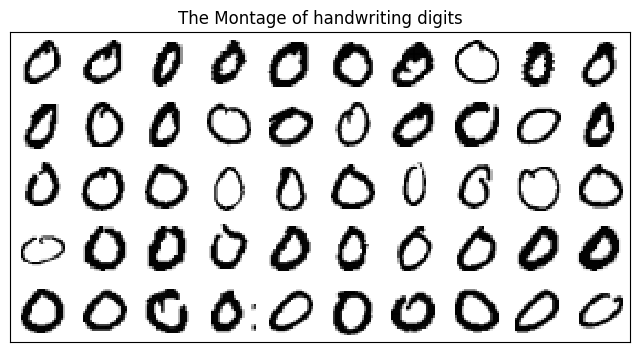

In [22]:
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') #image size sz*sz
    M = np.zeros((m*sz,n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[:, i*n+j].reshape(sz, sz)
    return M

plt.figure(figsize = (8, 6))
m, n = 5, 10 # m x n montage (total mn images)
M = montage(X, m, n)
plt.imshow(M, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()


In [2]:
fig, axes = plt.subplots(5, 10, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[:, i].reshape(28, 28), cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

NameError: name 'plt' is not defined

<br>
改變 digit_to_show 可改變呈現的數字

In [1]:
digit_to_show = 9
Digit = X[:, y==digit_to_show]
plt.figure(figsize = (12, 12))
m, n = 10, 20 # A m x n montage (total mn images)
M = montage(Digit, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'X' is not defined